In [1]:
import pyorc
import numpy as np
import pandas as pd
import xarray as xr
from Radar import Radar
import matplotlib.pyplot as plt
from datetime import datetime as dt
from matplotlib.colors import Normalize

In [2]:
df = pd.read_csv(
    "RSS_Data_Dec10.csv", 
    header=2,
    skiprows=[3,4]
)
df.TIMESTAMP = pd.to_datetime(df.TIMESTAMP)
df.Average_velocity = df.Average_velocity / 1000
df

/tmp/ipykernel_1454/3229757660.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.TIMESTAMP = pd.to_datetime(df.TIMESTAMP)


TIMESTAMP  RECORD  BattV_Min   PTemp  Baudrate  \
0    2024-09-12 13:00:00       0      12.57  18.050         1   
1    2024-09-12 14:00:00       1      12.43  20.350         1   
2    2024-09-12 15:00:00       2      12.42  22.810         1   
3    2024-09-12 16:00:00       3      12.43  17.210         1   
4    2024-09-12 17:00:00       4      12.43  19.000         1   
...                  ...     ...        ...     ...       ...   
2133 2024-12-10 10:00:00    2133      13.07  -8.700         1   
2134 2024-12-10 11:00:00    2134      12.98  -6.158         1   
2135 2024-12-10 12:00:00    2135      12.94  -4.818         1   
2136 2024-12-10 13:00:00    2136      12.88  -2.298         1   
2137 2024-12-10 14:00:00    2137      12.84  -0.266         1   

      Instantanous_velocity  Average_velocity  velocity_unit  \
0                       927             0.943              1   
1                       956             0.995              1   
2                       956             0.956              1   
3                       939             0.953              1   
4                       903             0.884              1   
...                     ...               ...            ...   
2133                    894             0.885              1   
2134                    889             0.888              1   
2135                    930             0.933              1   
2136                    884             0.881              1   
2137                    896             0.905              1   

      Tilt_angle_value  Flow_Direction  SNR_Instantenous  SNR_Average  
0                   43               1              7387         7310  
1                   44               1              7317         7235  
2                   44               1              7273         7280  
3                   44               1              7462         7435  
4                   43               1              7314         7398  
...                ...             ...               ...          ...  
2133                43               1              7178         7204  
2134                43               1              7185         7281  
2135                44               1              7300         7199  
2136                43               1              7369         7316  
2137                43               1              7299         7287  

[2138 rows x 12 columns]

In [3]:
radar = Radar(theta=55)

ds = xr.open_dataset("Results/December/video_capture_2024-12-01_09-00-05_velocimetry_results.nc")
cam = ds.to_dataframe().reset_index()[[
# cam = pd.read_csv("Results/video_capture_2024-09-12_12-00-04_radar_results.csv")[[
    'time', 'y', 'x', 'v_x', 'v_y', 's2n', 'corr', 'xp', 'yp', 'xs', 'ys'    
]]
cam['velocity'] = np.sqrt(cam.v_x**2 + cam.v_y**2)
cam['datetime'] = dt(2024, 9, 12, 13, 0, 0)
cam

time       y       x   v_x   v_y   s2n  corr           xp  \
0        0.515  10.015   0.125   NaN   NaN  0.00  0.00  3375.558594   
1        0.515  10.015   0.255   NaN   NaN  0.00  0.00  3319.317871   
2        0.515  10.015   0.385   NaN   NaN  0.00  0.00  3266.064453   
3        0.515  10.015   0.515   NaN   NaN  0.00  0.00  3215.566650   
4        0.515  10.015   0.645   NaN   NaN  0.00  0.00  3167.615967   
...        ...     ...     ...   ...   ...   ...   ...          ...   
1530370  4.655   0.135  20.145  0.08  0.00  3.24  0.51   939.845337   
1530371  4.655   0.135  20.275  0.03 -0.01  2.73  0.47   941.782654   
1530372  4.655   0.135  20.405  0.00  0.01  2.81  0.50   943.700012   
1530373  4.655   0.135  20.535  0.00  0.00  2.76  0.50   945.597717   
1530374  4.655   0.135  20.665  0.00  0.00  3.17  0.54   947.476135   

                  yp         xs         ys  velocity            datetime  
0          65.343262   5.183347   2.717083       NaN 2024-09-12 13:00:00  
1         105.780029   5.204489   2.845352       NaN 2024-09-12 13:00:00  
2         144.068848   5.225632   2.973621       NaN 2024-09-12 13:00:00  
3         180.376465   5.246774   3.101891       NaN 2024-09-12 13:00:00  
4         214.852783   5.267916   3.230160       NaN 2024-09-12 13:00:00  
...              ...        ...        ...       ...                 ...  
1530370  1232.473389  18.187707  20.863747  0.080000 2024-09-12 13:00:00  
1530371  1234.103271  18.208849  20.992016  0.031623 2024-09-12 13:00:00  
1530372  1235.716309  18.229992  21.120286  0.010000 2024-09-12 13:00:00  
1530373  1237.312988  18.251134  21.248555  0.000000 2024-09-12 13:00:00  
1530374  1238.893188  18.272276  21.376824  0.000000 2024-09-12 13:00:00  

[1530375 rows x 13 columns]

In [4]:
# cam_filtered = cam[radar.filter_point(cam.xs, cam.ys)]
# cam_filtered

In [5]:
df[df.TIMESTAMP == cam.datetime[0]].Average_velocity[0]

0.943

In [6]:
np.average(cam.velocity.dropna())

0.6754065743895893

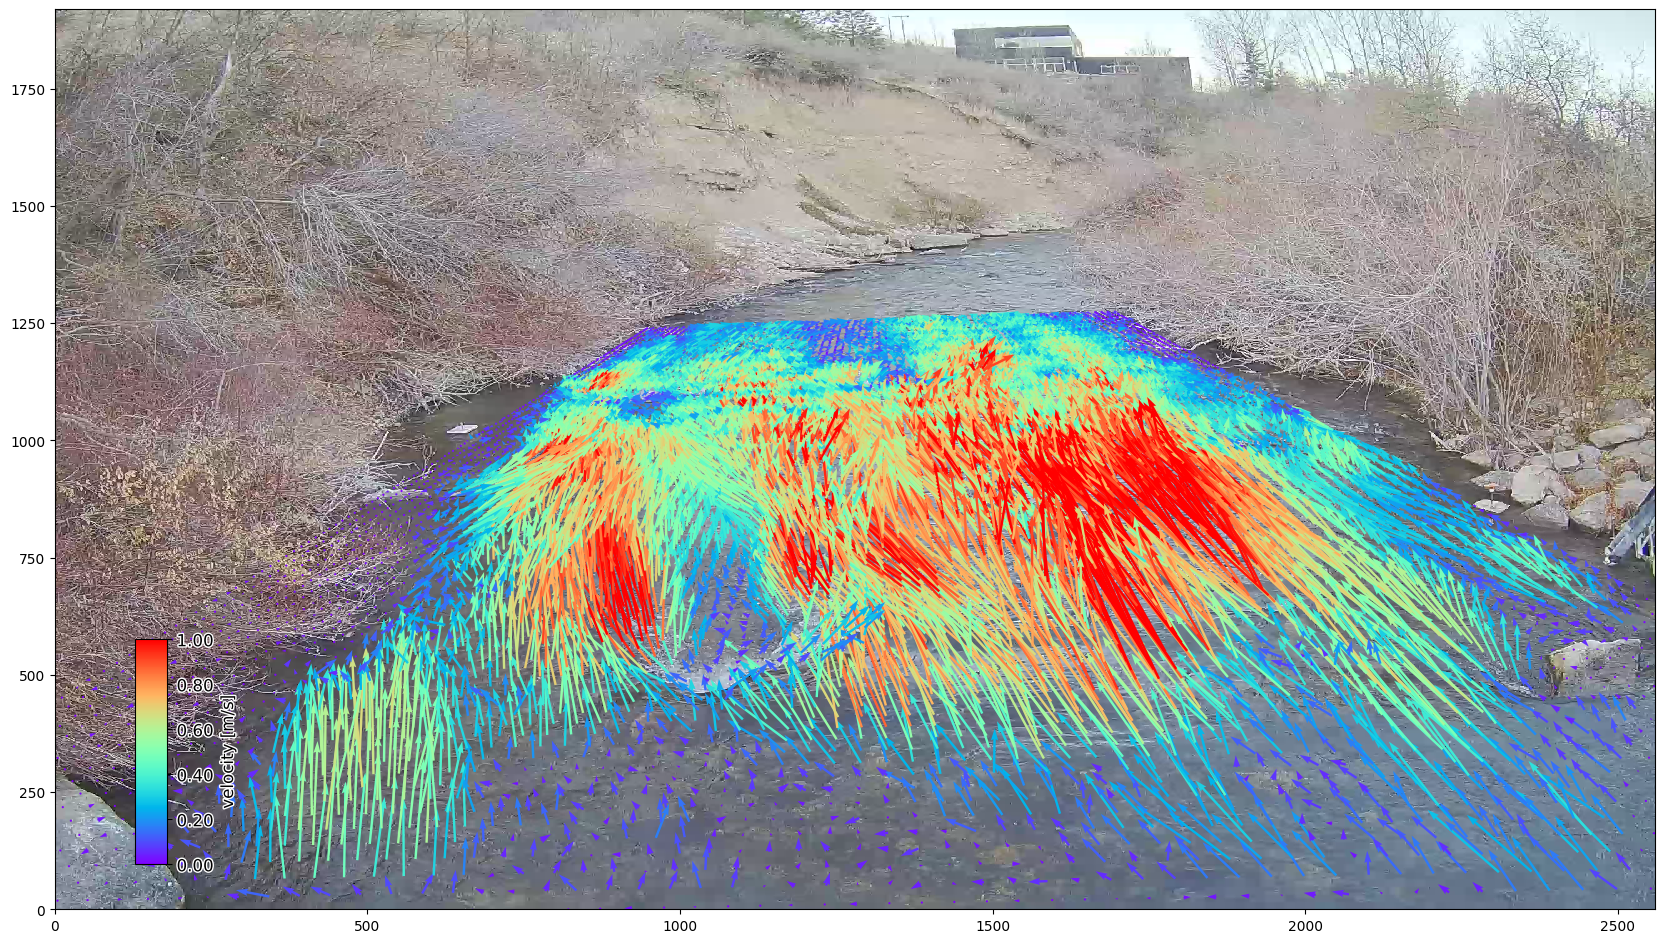

In [7]:
video = pyorc.Video("Videos/December/video_capture_2024-12-01_09-00-05.mp4", start_frame=0, end_frame=125)
video.camera_config = pyorc.load_camera_config("temp.json") # ds.velocimetry.camera_config
radar = Radar()

ds_new = ds.mean(dim="time", keep_attrs=True)

ds_new.velocimetry.plot(
    ax=video.get_frames(method="rgb")[0].frames.plot(mode="camera").axes,
    mode="camera",
    alpha=1,
    cmap="rainbow",
    scale=200,
    width=0.0015,
    norm=Normalize(vmin=0., vmax=1.0, clip=False),
    add_colorbar=True
)
plt.show()

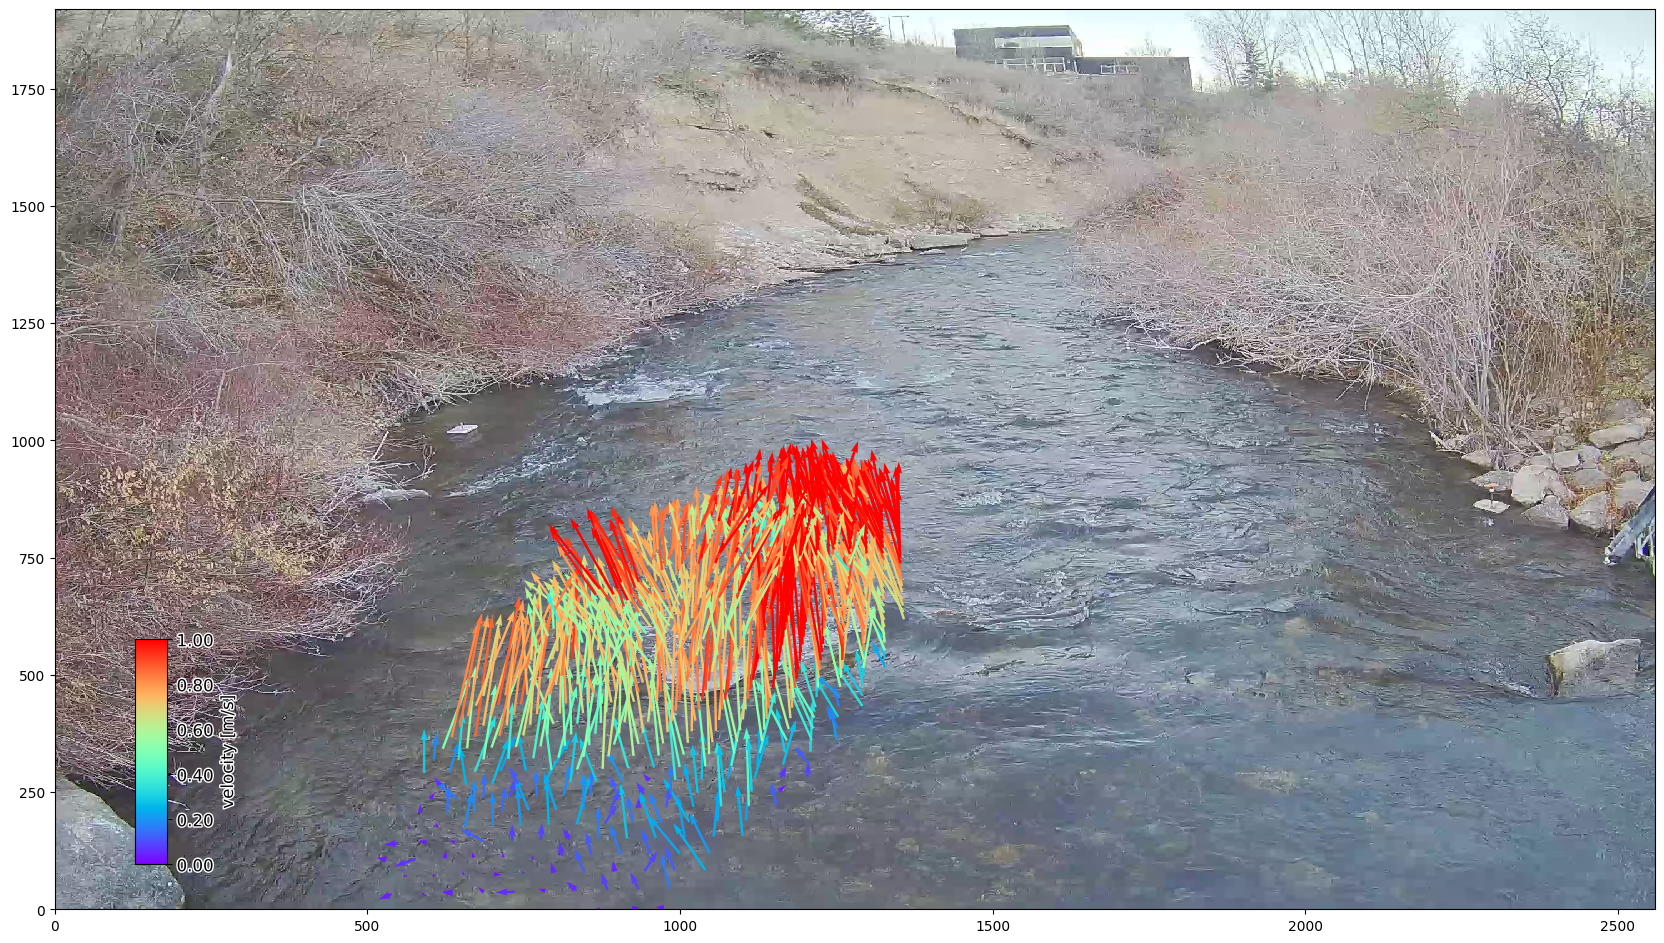

In [9]:
video = pyorc.Video("Videos/December/video_capture_2024-12-01_09-00-05.mp4", start_frame=0, end_frame=125)
video.camera_config = pyorc.load_camera_config("temp.json") # ds.velocimetry.camera_config
radar = Radar(theta=45)

ds_new = ds.copy()

ds_new = ds_new.where(radar.filter_point(ds.xs, ds.ys), drop=True)
ds_new = ds_new.mean(dim="time", keep_attrs=True)

ds_new.velocimetry.plot(
    ax=video.get_frames(method="rgb")[0].frames.plot(mode="camera").axes,
    mode="camera",
    alpha=1,
    cmap="rainbow",
    scale=200,
    width=0.0015,
    norm=Normalize(vmin=0., vmax=1.0, clip=False),
    add_colorbar=True
)
plt.show()